In [236]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
import keras
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import PrecisionRecallDisplay,RocCurveDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve,f1_score,auc
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss
from keras.layers import Dense,Dropout,Activation
from keras.models import Sequential
%matplotlib inline

## Reading and Preprocessing the data

In [237]:
# Read the data
df = pd.read_csv('creditcard.csv')

# Check the head of the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [238]:
# Check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [239]:
# Check the info of the data
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [240]:
# Check for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

0    284315
1       492
Name: Class, dtype: int64


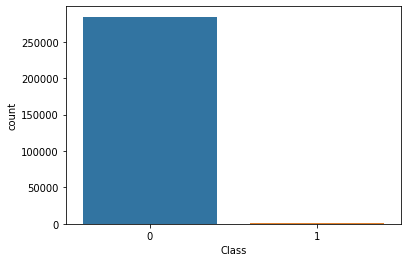

In [241]:
# Check the distribution of the target variable
sns.countplot(x='Class', data=df)
print(df['Class'].value_counts())

In [242]:
# Separate the data into features and target
X = df.drop(['Class'], axis=1)
y = df['Class']

In [243]:
# Sample the data to make it balanced
X, y = NearMiss().fit_resample(X, y)

In [244]:
# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<AxesSubplot:xlabel='Class', ylabel='count'>

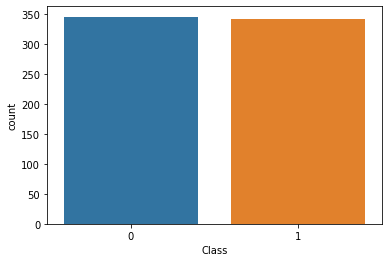

In [245]:
# Check the distribution of the target variable after sampling
sns.countplot(x=y_train)

In [246]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [247]:
# Define a function to plot the ROC-AUC curve
def plot_roc_auc_curve(y_test, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('The AUC-ROC curve of the model')
    plt.legend(loc="lower right")
    plt.show()

## Build the first model using Logistic Regression from scikit-learn

In [248]:
# Build the model using Logistic Regression from sklearn
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [249]:
# Predict the model
y_pred = model.predict(X_test)

# Check the accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy*100:.2f}%")

The accuracy of the model is 97.64%


In [250]:
# Check the precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       146
           1       1.00      0.95      0.98       150

    accuracy                           0.98       296
   macro avg       0.98      0.98      0.98       296
weighted avg       0.98      0.98      0.98       296



In [251]:
# Check the f1 score
f1 = f1_score(y_test, y_pred)
print(f"The f1 score of the model is {f1*100:.2f}%")

The f1 score of the model is 97.61%


Text(0.5, 1.0, 'Precision-Recall curve for Logistic Regression')

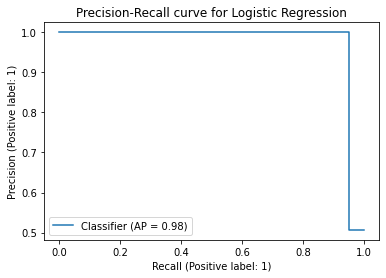

In [252]:
# Plot the AUPRC curve
disp = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_title('Precision-Recall curve for Logistic Regression')

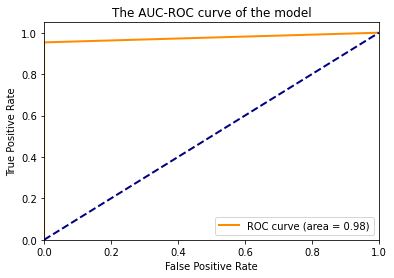

In [253]:
# Plot the AUC-ROC curve
plot_roc_auc_curve(y_test, y_pred)

<AxesSubplot:>

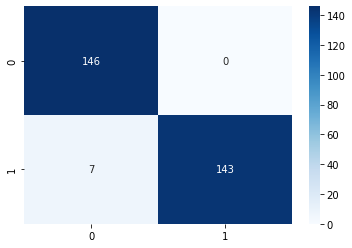

In [254]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Build the model using a Decision Tree from sklearn

In [264]:
# Build the model using Decision Tree from sklearn
model = DecisionTreeClassifier()

In [265]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [266]:
# Predict the model
y_pred = model.predict(X_test)

In [267]:
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy*100:.2f}%")

The accuracy of the model is 96.96%


In [268]:
# Check the precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       146
           1       0.98      0.96      0.97       150

    accuracy                           0.97       296
   macro avg       0.97      0.97      0.97       296
weighted avg       0.97      0.97      0.97       296



In [269]:
# Check the f1 score
f1 = f1_score(y_test, y_pred)
print(f"The f1 score of the model is {f1*100:.2f}%")

The f1 score of the model is 96.97%


Text(0.5, 1.0, 'Precision-Recall curve for Decision Tree')

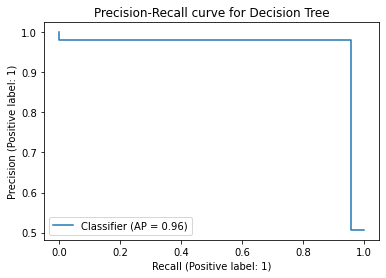

In [270]:
# Plot the AUPRC curve
disp = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_title('Precision-Recall curve for Decision Tree')

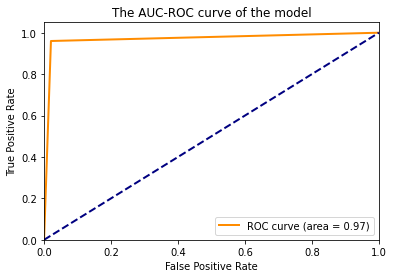

In [271]:
# Plot the AUC-ROC curve
plot_roc_auc_curve(y_test, y_pred)

<AxesSubplot:>

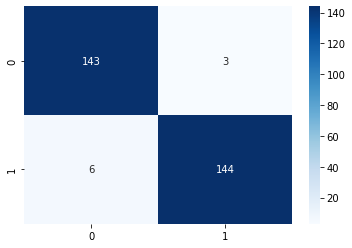

In [272]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

## Build the model using Random Forest from sklearn

In [282]:
# Build the model using Random Forest from sklearn
model = RandomForestClassifier()

In [283]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier()

In [284]:
# Predict the model
y_pred = model.predict(X_test)

In [285]:
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy of the model is {accuracy*100:.2f}%")

The accuracy of the model is 97.97%


In [286]:
# Check the precision and recall
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       146
           1       0.99      0.97      0.98       150

    accuracy                           0.98       296
   macro avg       0.98      0.98      0.98       296
weighted avg       0.98      0.98      0.98       296



In [287]:
# Check the f1 score
f1 = f1_score(y_test, y_pred)
print(f"The f1 score of the model is {f1*100:.2f}%")

The f1 score of the model is 97.97%


Text(0.5, 1.0, 'Precision-Recall curve for Random Forest Classifier from sklearn')

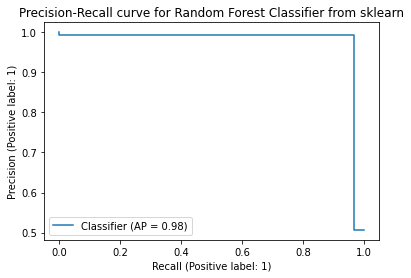

In [288]:
# Plot the AUPRC curve
disp = PrecisionRecallDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_title('Precision-Recall curve for Random Forest Classifier from sklearn')

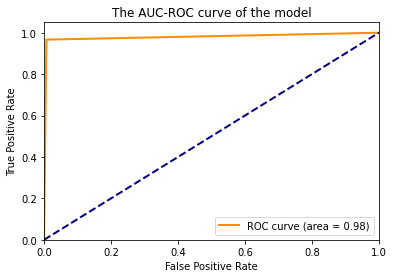

In [289]:
# Plot the AUC-ROC curve
plot_roc_auc_curve(y_test, y_pred)

<AxesSubplot:>

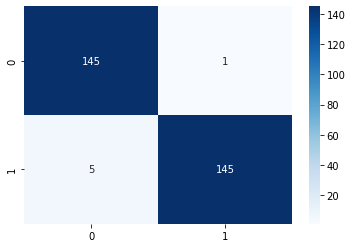

In [290]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')